<a href="https://colab.research.google.com/github/Sakshiipaidalwar/OIBSIP-Internship-Projects/blob/main/EDA_on_Retail_sales_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA ON RETAIL SALES DATA






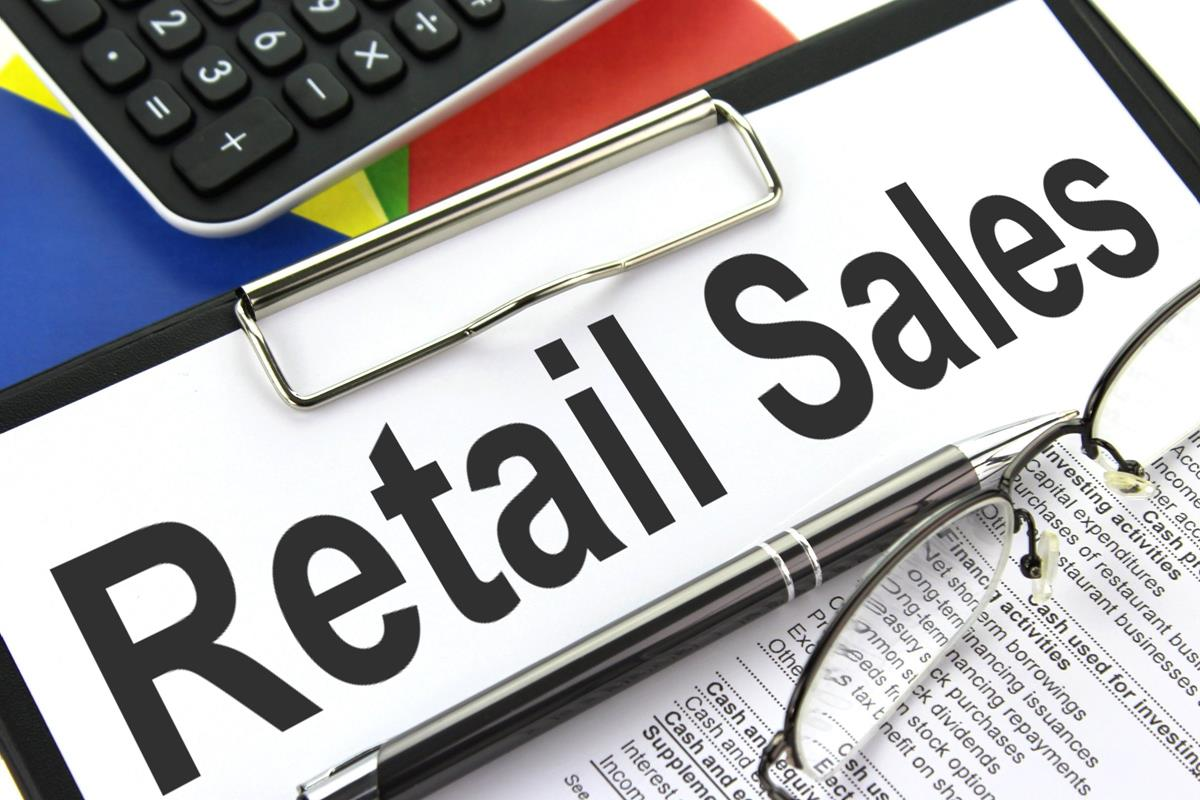





Description:

In this project, you will work with a dataset containing information about retail sales. The goal is
to perform exploratory data analysis (EDA) to uncover patterns, trends, and insights that can
help the retail business make informed decisions.

In [ ]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the dataset
# Replace 'retail_sales.csv' with the path to your dataset
df = pd.read_csv('/content/Retail sales Data.csv')

In [ ]:
# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(df.head())

First few rows of the dataset:
   Transaction ID        Date Customer ID  Gender  Age Product Category  \
0               1  24-11-2023     CUST001    Male   34           Beauty   
1               2  27-02-2023     CUST002  Female   26         Clothing   
2               3  13-01-2023     CUST003    Male   50      Electronics   
3               4  21-05-2023     CUST004    Male   37         Clothing   
4               5  06-05-2023     CUST005    Male   30           Beauty   

   Quantity  Price per Unit  Total Amount  
0         3              50           150  
1         2             500          1000  
2         1              30            30  
3         1             500           500  
4         2              50           100  


In [ ]:
# Display the structure of the dataset
print("\nDataset info:")
print(df.info())


Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB
None


In [ ]:
# Check for missing values
print("\nMissing values in the dataset:")
print(df.isnull().sum())


Missing values in the dataset:
Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64


In [ ]:
# Get basic statistics for numerical features
print("\nBasic statistics for numerical features:")
print(df.describe())


Basic statistics for numerical features:
       Transaction ID         Age     Quantity  Price per Unit  Total Amount
count     1000.000000  1000.00000  1000.000000     1000.000000   1000.000000
mean       500.500000    41.39200     2.514000      179.890000    456.000000
std        288.819436    13.68143     1.132734      189.681356    559.997632
min          1.000000    18.00000     1.000000       25.000000     25.000000
25%        250.750000    29.00000     1.000000       30.000000     60.000000
50%        500.500000    42.00000     3.000000       50.000000    135.000000
75%        750.250000    53.00000     4.000000      300.000000    900.000000
max       1000.000000    64.00000     4.000000      500.000000   2000.000000


In [ ]:
# Get basic statistics for categorical features
print("\nBasic statistics for categorical features:")
print(df.describe(include=['O']))


Basic statistics for categorical features:
              Date Customer ID  Gender Product Category
count         1000        1000    1000             1000
unique         345        1000       2                3
top     16-05-2023     CUST001  Female         Clothing
freq            11           1     510              351


### UNIVARIATE ANALYSIS

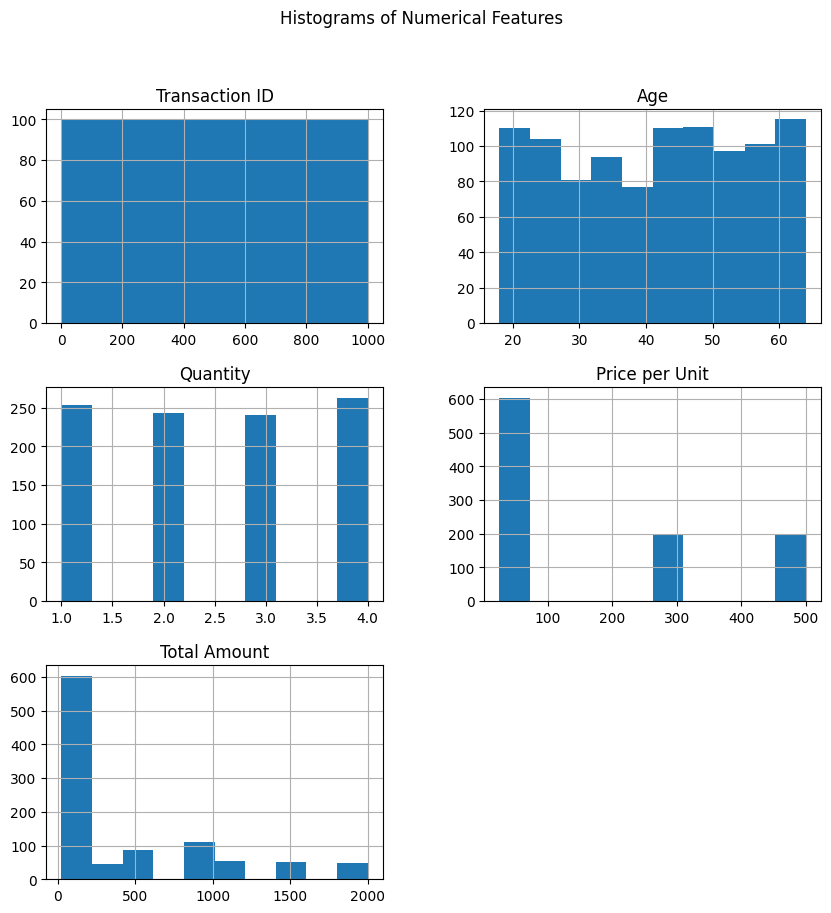

In [ ]:
# Histograms for numerical features
df.hist(figsize=(10, 10))
plt.suptitle('Histograms of Numerical Features')
plt.show()

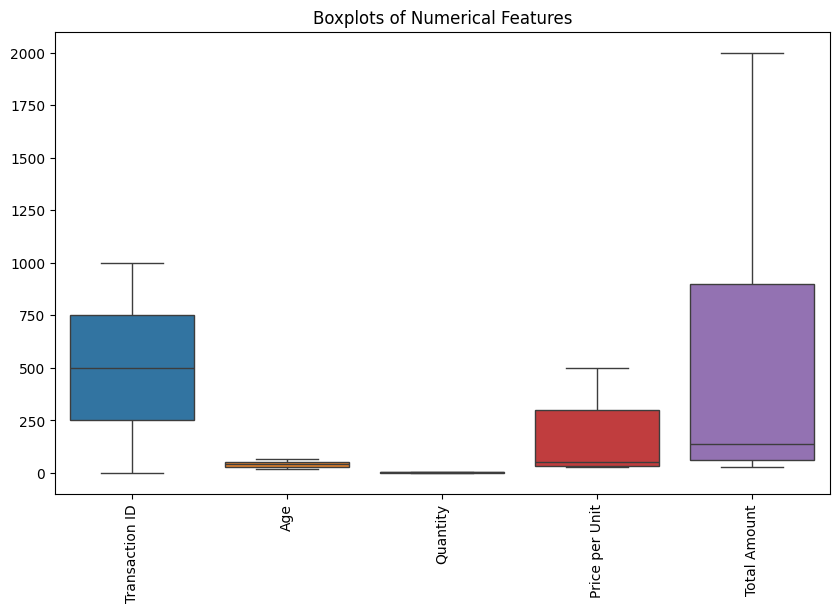

In [ ]:
# Boxplots for numerical features
plt.figure(figsize=(10, 6))
sns.boxplot(data=df.select_dtypes(include=[np.number]))
plt.title('Boxplots of Numerical Features')
plt.xticks(rotation=90)
plt.show()


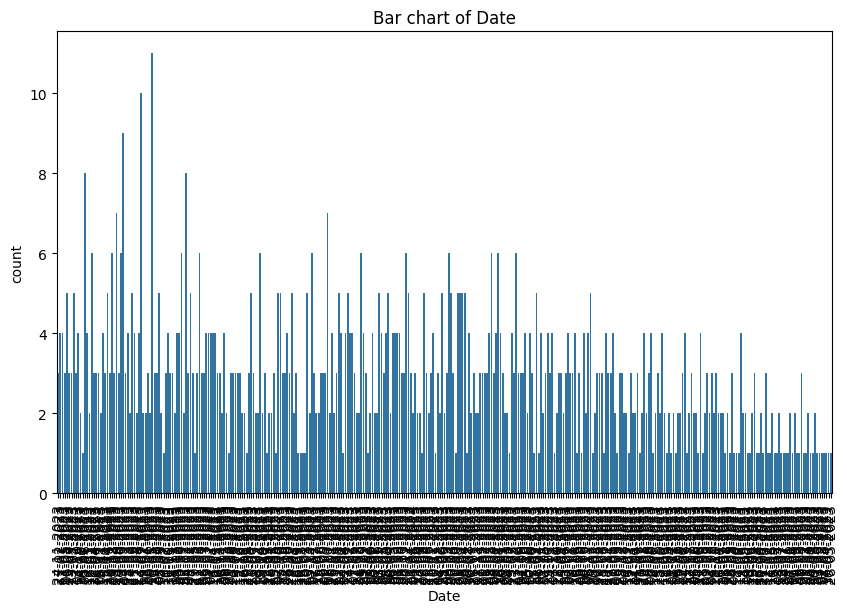

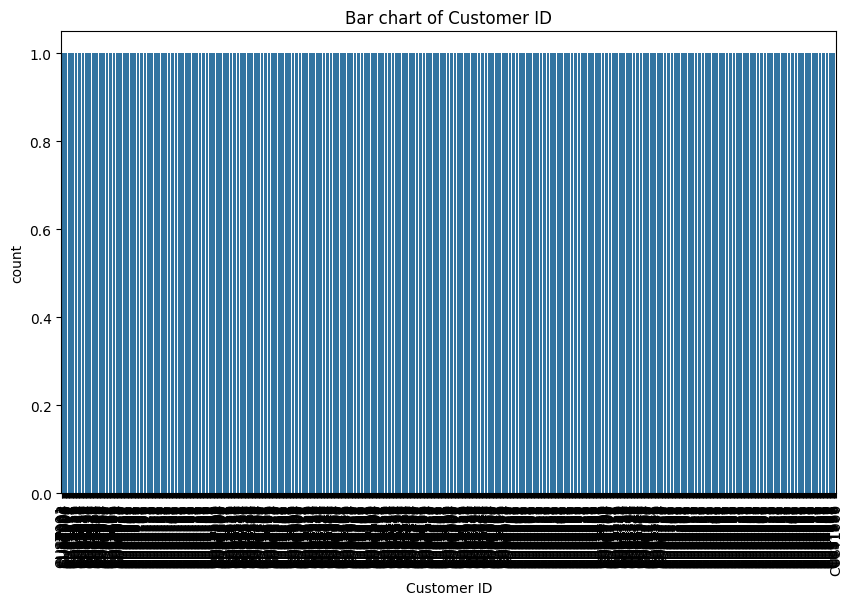

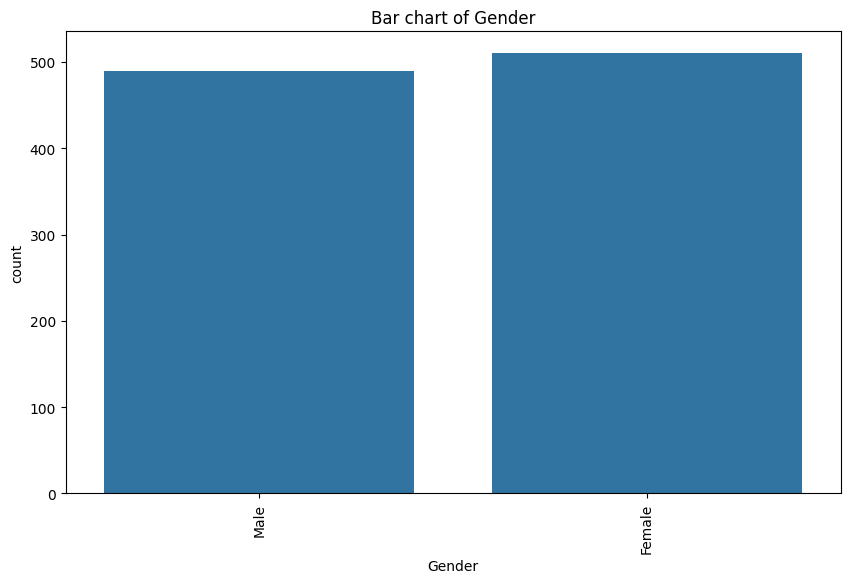

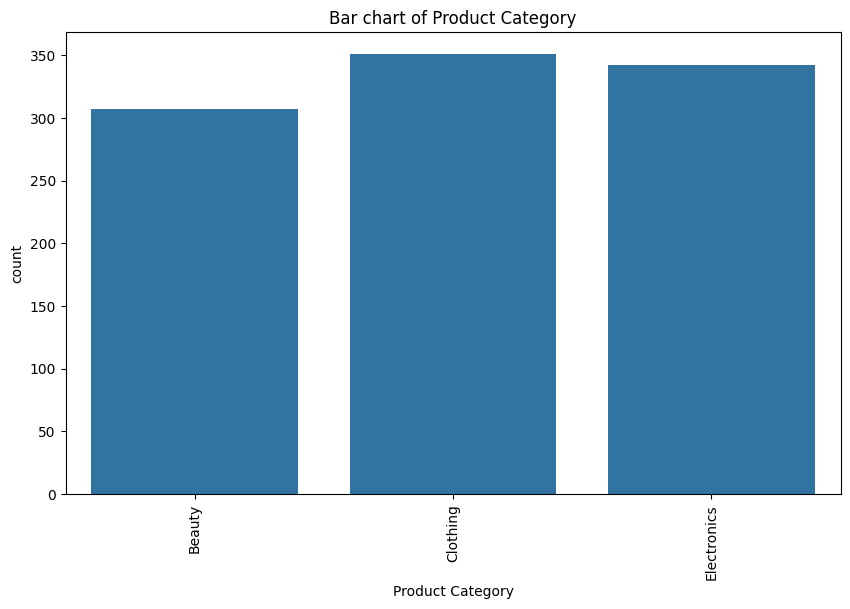

In [ ]:
# Bar charts for categorical features
categorical_features = df.select_dtypes(include=['O']).columns
for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=feature)
    plt.title(f'Bar chart of {feature}')
    plt.xticks(rotation=90)
    plt.show()


###BIVARIATE ANALYSIS


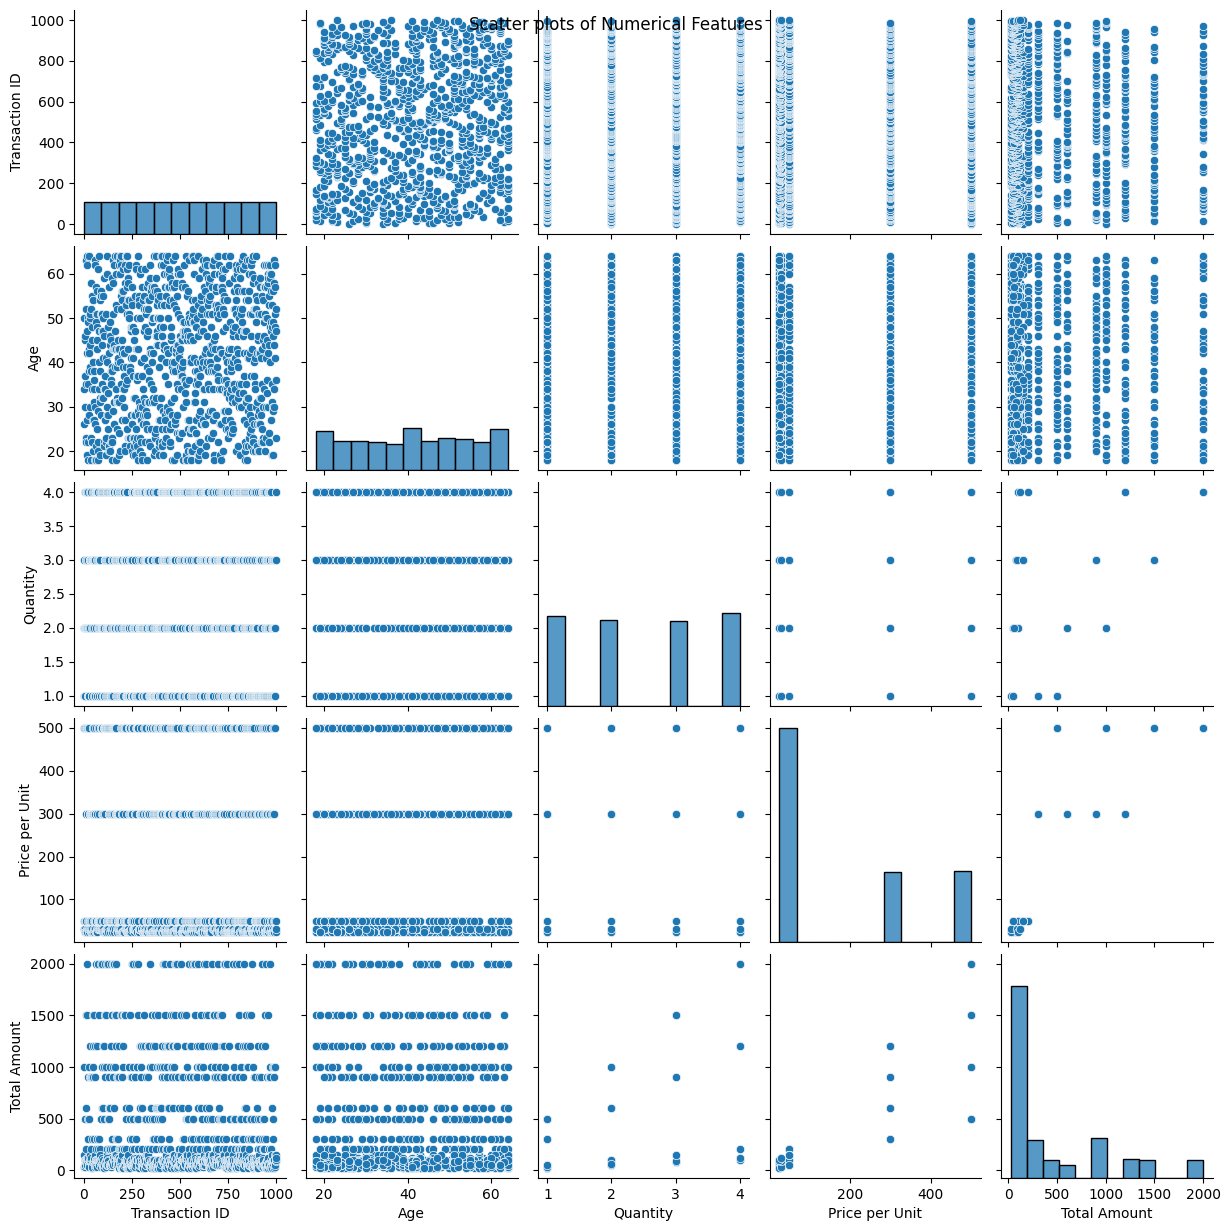

In [ ]:
# Scatter plots for numerical features
numerical_features = df.select_dtypes(include=[np.number]).columns
sns.pairplot(df[numerical_features])
plt.suptitle('Scatter plots of Numerical Features')
plt.show()

<ipython-input-24-9aa53efa7110>:8: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df[col] = pd.to_datetime(df[col])
<ipython-input-24-9aa53efa7110>:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col])
<ipython-input-24-9aa53efa7110>:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col])
<ipython-input-24-9aa53efa7110>:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col])


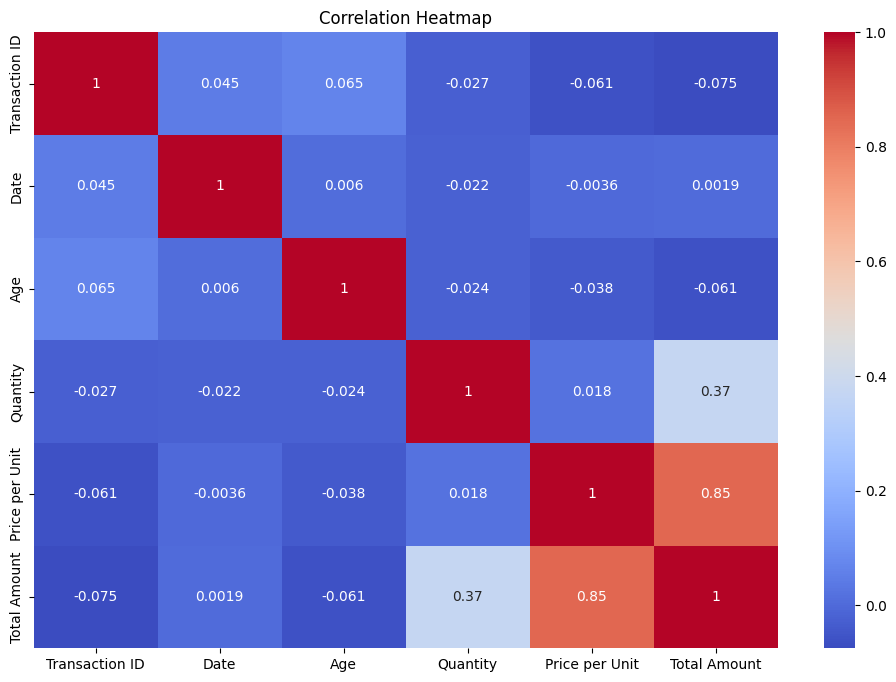

In [ ]:
# Correlation heatmap
plt.figure(figsize=(12, 8))

# Convert date columns to datetime objects if needed
for col in df.columns:
    if df[col].dtype == 'object':  # Check if column is of object type (potentially string)
        try:
            df[col] = pd.to_datetime(df[col])
        except:
            pass  # Handle cases where conversion might not be applicable

# Extract numerical columns and calculate correlation
numerical_df = df.select_dtypes(include=[np.number, 'datetime'])  # Include datetime columns
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm')

plt.title('Correlation Heatmap')
plt.show()

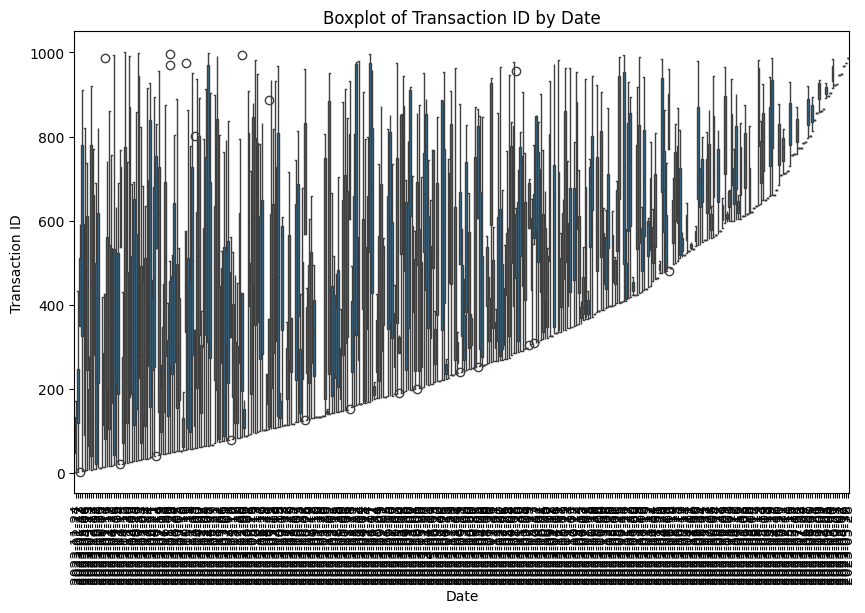

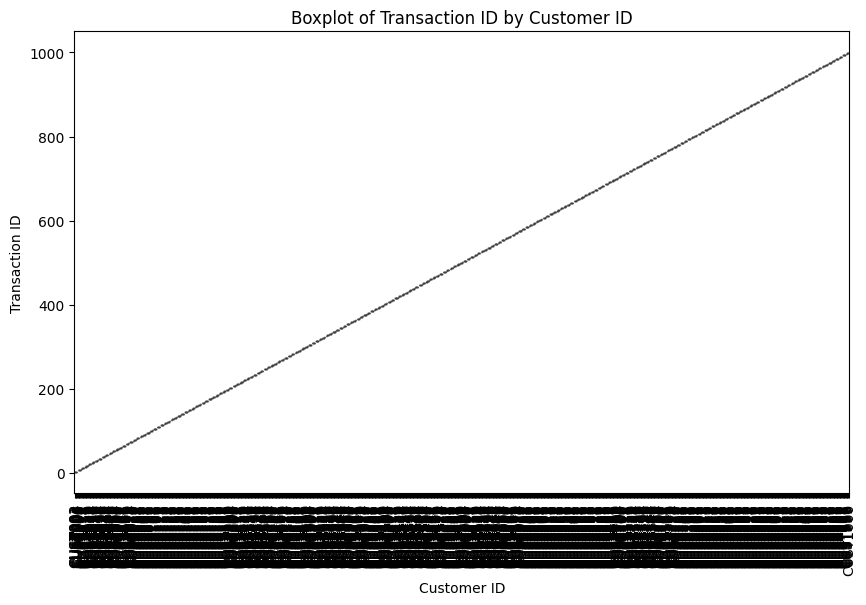

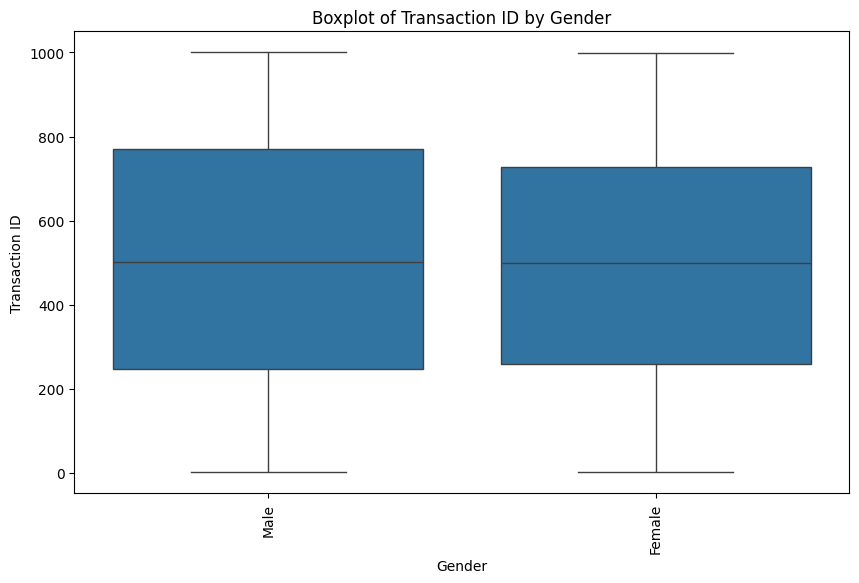

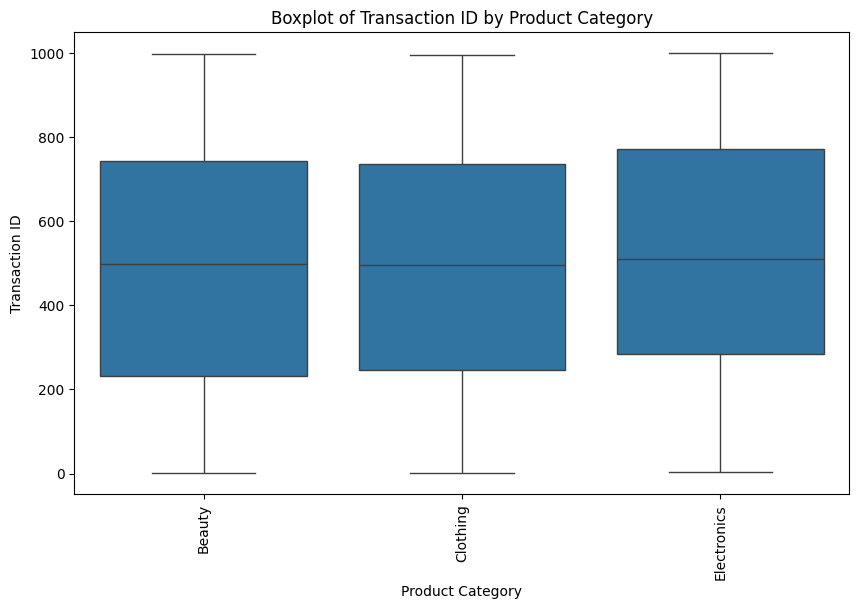

In [35]:
# Boxplots for numerical vs. categorical features
for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, x=feature, y=numerical_features[0])  # Replace with relevant numerical feature
    plt.title(f'Boxplot of {numerical_features[0]} by {feature}')
    plt.xticks(rotation=90)
    plt.show()